In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation
import matplotlib.pyplot as plt  
%matplotlib inline

C:\Users\howar\AppData\Local\Continuum\anaconda3\envs\tensorflow_1.10\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def generate_data_1():
    x = np.linspace(0.00001,1,9999)
    y = np.sin(5*np.pi*x)/(5*np.pi*x)
    
    index=list(range(0,9999))
    np.random.seed(1024)
    np.random.shuffle(index)
    
    x_u = x[index]
    y_u = y[index]
    
    x_train = x_u[0:9000]
    y_train = y_u[0:9000]

    x_test = x_u[9000:]
    y_test = y_u[9000:]

    return (x_train,y_train,x_test,y_test,x,y)

In [3]:
def generate_data_2():

    x = np.linspace(0.00001,1,9999)
    y = np.sign( np.sin(5*np.pi*x) )

    index=list(range(0,9999))
    np.random.seed(1024)
    np.random.shuffle(index)
    
    x_u = x[index]
    y_u = y[index]
    
    x_train = x_u[0:9000]
    y_train = y_u[0:9000]
    
    x_test = x_u[9000:]
    y_test = y_u[9000:]

    return (x_train,y_train,x_test,y_test,x,y)

In [4]:
def model_generator_1():

    print('model_1 build')

    model = Sequential()
    
    model.add( Dense( 5 , input_shape=(1,) ) )
    model.add( Activation('relu') ) 
    model.add( Dense(5) )
    model.add( Activation('relu') ) 
    model.add( Dense(5) )
    model.add( Activation('relu') ) 
    model.add( Dense(5) )
    model.add( Activation('relu') ) 
    model.add( Dense(5) )
    model.add( Activation('relu') )
    model.add( Dense(1) )
    
    model.compile( loss = 'mse', optimizer='adam')
    print(model.summary())

    return model

In [5]:
def model_generator_2():

    print('model_3 build')

    model = Sequential()

    model.add( Dense( 10 , input_shape=(1,) ) )
    model.add( Activation('relu') ) 
    model.add( Dense(6) )
    model.add( Activation('relu') ) 
    model.add( Dense(6) )
    model.add( Activation('relu') ) 
    model.add( Dense(1) )

    model.compile( loss = 'mse', optimizer='adam')

    print(model.summary())

    return model  

In [6]:
def model_generator_3():

    
    print('model_2 build')

    model = Sequential()

    model.add( Dense( 45 , input_shape=(1,) ) )
    model.add( Activation('relu') ) 
    model.add( Dense(1) )

    model.compile( loss = 'mse', optimizer='adam')

    print(model.summary())

    return model

In [7]:
def train(x_train,y_train,x_test,y_test,x,y,epochs,target_fun):

    

    model_1 = model_generator_1()

    model_2 = model_generator_2()

    model_3 = model_generator_3()


    history_1 = model_1.fit( x_train, y_train, batch_size=100, epochs=epochs, verbose=1, validation_data=(x_test,y_test) )

    history_2 = model_2.fit( x_train, y_train, batch_size=100, epochs=epochs, verbose=1, validation_data=(x_test,y_test) )

    history_3 = model_3.fit( x_train, y_train, batch_size=100, epochs=epochs, verbose=1, validation_data=(x_test,y_test) )

    
    plt.plot(history_1.history['val_loss'], color = 'blueviolet', label='Deep')
    plt.plot(history_2.history['val_loss'], color = 'brown', label='Medium')
    plt.plot(history_3.history['val_loss'], color = 'green', label='Shallow')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    if target_fun == 1:
        plt.title('y =' + r'$\frac{sin(5\pi x)}{5\pi x}$')
    else:
        plt.title('y = sgn(' + r'$sin(5\pi x)$)')
    plt.show()

    

    y_1 = model_1.predict(x)

    y_2 = model_2.predict(x)

    y_3 = model_3.predict(x)

    

    plt.plot(y, label='True')

    plt.plot(y_1, color = 'blueviolet', label='Deep')
    plt.plot(y_2, color = 'brown', label='Medium')
    plt.plot(y_3, color = 'green', label='Shallow')
    plt.xlabel("X")
    plt.ylabel("Y_value")
    plt.legend()
    if target_fun == 1:
        plt.title('y =' + r'$\frac{sin(5\pi x)}{5\pi x}$')
    else:
        plt.title('y = sgn(' + r'$sin(5\pi x)$)')
    

    plt.show()

model_1 build
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 10        
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30     

9000/9000 [==============================] - 0s 9us/step - loss: 0.0640 - val_loss: 0.0654
Epoch 21/50
9000/9000 [==============================] - 0s 9us/step - loss: 0.0640 - val_loss: 0.0657
Epoch 22/50
9000/9000 [==============================] - 0s 9us/step - loss: 0.0640 - val_loss: 0.0657
Epoch 23/50
9000/9000 [==============================] - 0s 9us/step - loss: 0.0641 - val_loss: 0.0654
Epoch 24/50
9000/9000 [==============================] - 0s 9us/step - loss: 0.0640 - val_loss: 0.0654
Epoch 25/50
9000/9000 [==============================] - 0s 9us/step - loss: 0.0640 - val_loss: 0.0657
Epoch 26/50
9000/9000 [==============================] - 0s 11us/step - loss: 0.0642 - val_loss: 0.0654
Epoch 27/50
9000/9000 [==============================] - 0s 9us/step - loss: 0.0640 - val_loss: 0.0654
Epoch 28/50
9000/9000 [==============================] - 0s 13us/step - loss: 0.0641 - val_loss: 0.0656
Epoch 29/50
9000/9000 [==============================] - 0s 10us/step - loss: 0.064

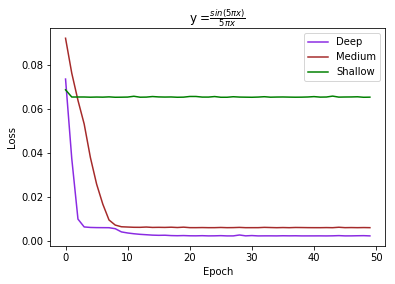

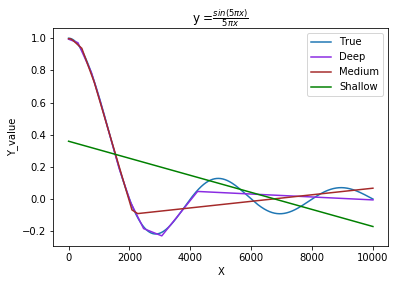

In [8]:
x_train,y_train,x_test,y_test,x,y = generate_data_1()
train(x_train,y_train,x_test,y_test,x,y,50, 1)

model_1 build
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 5)                 10        
_________________________________________________________________
activation_10 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 30        
_________________________________________________________________
activation_11 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 30        
_________________________________________________________________
activation_12 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 30     

9000/9000 [==============================] - 0s 10us/step - loss: 0.1818 - val_loss: 0.1821
Epoch 121/150
9000/9000 [==============================] - 0s 13us/step - loss: 0.1785 - val_loss: 0.1767
Epoch 122/150
9000/9000 [==============================] - 0s 11us/step - loss: 0.1783 - val_loss: 0.1831
Epoch 123/150
9000/9000 [==============================] - 0s 13us/step - loss: 0.1799 - val_loss: 0.1802
Epoch 124/150
9000/9000 [==============================] - 0s 13us/step - loss: 0.1791 - val_loss: 0.1773
Epoch 125/150
9000/9000 [==============================] - 0s 11us/step - loss: 0.1789 - val_loss: 0.1796
Epoch 126/150
9000/9000 [==============================] - 0s 11us/step - loss: 0.1785 - val_loss: 0.1772
Epoch 127/150
9000/9000 [==============================] - 0s 11us/step - loss: 0.1783 - val_loss: 0.1793
Epoch 128/150
9000/9000 [==============================] - 0s 9us/step - loss: 0.1773 - val_loss: 0.1762
Epoch 129/150
9000/9000 [==============================] - 0s

9000/9000 [==============================] - 0s 11us/step - loss: 0.5926 - val_loss: 0.6186
Epoch 126/150
9000/9000 [==============================] - 0s 11us/step - loss: 0.5930 - val_loss: 0.6123
Epoch 127/150
9000/9000 [==============================] - 0s 11us/step - loss: 0.5922 - val_loss: 0.6156
Epoch 128/150
9000/9000 [==============================] - 0s 11us/step - loss: 0.5929 - val_loss: 0.6105
Epoch 129/150
9000/9000 [==============================] - 0s 9us/step - loss: 0.5926 - val_loss: 0.6087
Epoch 130/150
9000/9000 [==============================] - 0s 10us/step - loss: 0.5914 - val_loss: 0.6171
Epoch 131/150
9000/9000 [==============================] - 0s 11us/step - loss: 0.5930 - val_loss: 0.6112
Epoch 132/150
9000/9000 [==============================] - 0s 11us/step - loss: 0.5930 - val_loss: 0.6085
Epoch 133/150
9000/9000 [==============================] - 0s 11us/step - loss: 0.5918 - val_loss: 0.6112
Epoch 134/150
9000/9000 [==============================] - 0s

Epoch 53/150
9000/9000 [==============================] - 0s 8us/step - loss: 0.9001 - val_loss: 0.8923
Epoch 54/150
9000/9000 [==============================] - 0s 9us/step - loss: 0.8949 - val_loss: 0.8897
Epoch 55/150
9000/9000 [==============================] - 0s 9us/step - loss: 0.8880 - val_loss: 0.8790
Epoch 56/150
9000/9000 [==============================] - 0s 9us/step - loss: 0.8815 - val_loss: 0.8725
Epoch 57/150
9000/9000 [==============================] - 0s 9us/step - loss: 0.8729 - val_loss: 0.8675
Epoch 58/150
9000/9000 [==============================] - 0s 9us/step - loss: 0.8658 - val_loss: 0.8589
Epoch 59/150
9000/9000 [==============================] - 0s 8us/step - loss: 0.8578 - val_loss: 0.8512
Epoch 60/150
9000/9000 [==============================] - 0s 9us/step - loss: 0.8498 - val_loss: 0.8433
Epoch 61/150
9000/9000 [==============================] - 0s 10us/step - loss: 0.8417 - val_loss: 0.8387
Epoch 62/150
9000/9000 [==============================] - 0s 11

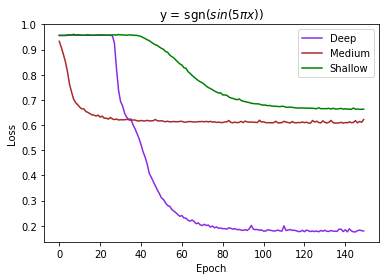

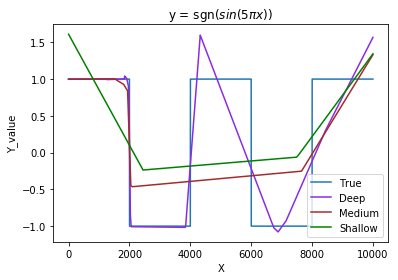

In [9]:
x_train,y_train,x_test,y_test,x,y = generate_data_2()
train(x_train,y_train,x_test,y_test,x,y,150, 2)